In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [2]:
Data = pd.read_csv("Private Sector Data.csv")

In [3]:
Data = Data[:154]
Data

,A. Would you be intested to participate in this Study,B. Interview date,C. Surveyor name,E. Sector,G. Position/job title of interviewee in the firm,H. Phone number,Q1. Which of the inspectorate authorities visited your facility during the past year 2019? ( More than one option allowed),Q1_1 Greater Amman Municipality,Q1_2 Ministry of Health/Vocational Health,Q1_3 Ministry of Health/Environmental Health,...,Q2.7_Committee,Q2.8_Committee,Q2.9_Committee,Q2.10_Committee,"Q3.1 Your Awareness of your enterprise’s legal rights (e.g. the legal limits, appeal or object on the inspection results, complaining about the inspection process)",Q3.2 Your awareness of inspection procedures and the legal and technical obligations of your enterprise,Q3.3 Inspector's awareness of technical and scientific aspects,Q3.4 Inspector’s performance and conduct during the inspection visit,Q3.5 Fairness of inspector decisions,Q3.6 Frequency and duplication of inspection visits
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.7 Do you think the inspector is aware of the...,2.8 Are you satisfied with the inspector’s per...,2.9 Have you ever been subject to unfair penal...,"2.10 During the past years, have you noticed p...",1. Your Awareness of your enterprise’s legal r...,2. Your awareness of inspection procedures and...,3. Inspector's awareness of technical and scie...,4. Inspector’s performance and conduct during ...,5. Fairness of inspector decisions,6. Frequency and duplication of inspection vis...
1,1.0,8/29/2020,2.0,9. Cars and Heavy Machinery and Fittings Secto...,2. General Manager,795505308.0,1 13,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1,1,3,3,0,3
2,1.0,8/29/2020,2.0,4. Therapeutics and Medical Industry Sector,2. General Manager,795672534.0,1 11 12,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1,1,1,1,0,3
3,1.0,8/29/2020,2.0,4. Therapeutics and Medical Industry Sector,8. Other (Specify),795527109.0,1 10 12 13 14,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1,3,3,1,1,1
4,1.0,8/29/2020,2.0,9. Cars and Heavy Machinery and Fittings Secto...,8. Other (Specify),795703124.0,1 3 6 13 14 15,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,1,1,3,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1.0,9/8/2020,2.0,4. Therapeutics and Medical Industry Sector,2. General Manager,796665648.0,1 2 10 11 12 13 14,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,2,3,3,3,1,3
150,1.0,9/8/2020,2.0,8. Health and Pharmaceutical Trade Sector,1. Owner/Partner,795507544.0,3 11 12,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,1,1,1,1,1,3
151,1.0,9/8/2020,2.0,8. Health and Pharmaceutical Trade Sector,4. Chief executive,795127393.0,1 10,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1,1,1,1,1,3
152,1.0,9/8/2020,2.0,4. Therapeutics and Medical Industry Sector,3. Quality Management,788838740.0,1 8 10 12 13,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,3,3,3,1,1,3


In [4]:
X = Data.iloc[1:, [26, 28, 29, 30, 31, 32, 33, 34, 35]] #Return only specific columns
X

,Q2.1_GAM,Q2.3_GAM,Q2.4_GAM,Q2.5_GAM,Q2.6_GAM,Q2.7_GAM,Q2.8_GAM,Q2.9_GAM,Q2.10_GAM
1,3,1,1,1,0,0,0,0,1
2,3,1,1,1,0,1,1,0,2
3,2,3,1,1,0,1,1,0,2
4,2,3,1,1,0,0,0,0,3
5,1,5,1,1,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...
149,24,24,1,0,0,0,0,0,1
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,2,2,1,1,0,1,1,0,3
152,4,4,1,0,0,0,1,0,3


In [17]:
df = X.dropna()
df

,Q2.1_GAM,Q2.3_GAM,Q2.4_GAM,Q2.5_GAM,Q2.6_GAM,Q2.7_GAM,Q2.8_GAM,Q2.9_GAM,Q2.10_GAM
1,3,1,1,1,0,0,0,0,1
2,3,1,1,1,0,1,1,0,2
3,2,3,1,1,0,1,1,0,2
4,2,3,1,1,0,0,0,0,3
5,1,5,1,1,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...
148,1,1,1,0,0,1,1,0,3
149,24,24,1,0,0,0,0,0,1
151,2,2,1,1,0,1,1,0,3
152,4,4,1,0,0,0,1,0,3


In [20]:
#Logistic Regression 1
X = df.iloc[:,[2]]
Y = df.iloc[:, [8]]
Y

,Q2.10_GAM
1,1
2,2
3,2
4,3
5,3
...,...
148,3
149,1
151,3
152,3


In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
model = LogisticRegression(solver='liblinear', C=100.0, random_state=0).fit(X, Y)

C:\Users\aditm\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [50]:
model.classes_
model.intercept_
model.coef_
p_pred = model.predict_proba(X)
y_pred = model.predict(Y)
score_ = model.score(X, Y)
conf_m = confusion_matrix(Y, y_pred)
report = classification_report(Y, y_pred)
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')

p_pred:
[[0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.00474038 0.10604371 0.8892159 ]
 [0.16241087 0.12792274 0.70966639]
 [0.00474038 0.10604371 0.8892159 ]
 [0.00474038 0.10604371 0.8892159 ]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.00474038 0.10604371 0.8892159 ]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.00474038 0.10604371 0.8892159 ]
 [0.16241087 0.12792274 0.70966639]
 [0.16241087 0.12792274 0.70966639]
 [0.00474038 0.10604

C:\Users\aditm\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: unhashable type: 'numpy.ndarray'

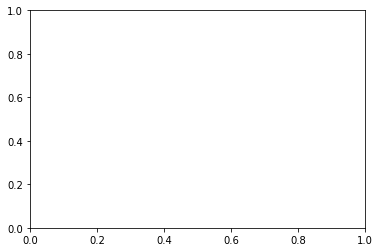

In [40]:
plt.scatter(X, Y)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
clf.score(X, y)

In [ ]:
target_names = ["Improved","Declined","Has Not Changed"]


In [ ]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')

graph = graphviz.Source(dot_data)  
graph 

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus